In [60]:
import warnings
warnings.filterwarnings ('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

# Who is the better ODI Batsman? Modern Day Master or Master Blaster?

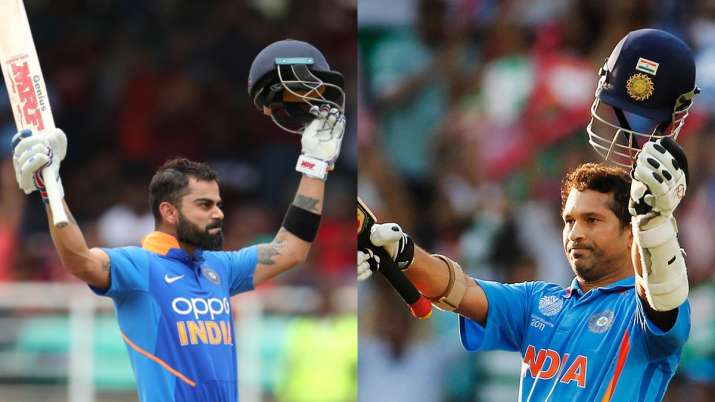

In [2]:
df = pd.read_csv(r'C:\Users\HARSHIT\Downloads\msd analysis\ODI_data.csv')

In [3]:
df.head(1)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate
0,E Lewis,65,65,128,1.0,0.0,80,8,1,81.25,2,v India,Port of Spain,11-08-2019,West Indies,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
len(df.columns)

28

In [5]:
df.shape

(171968, 28)

In [6]:
df['Innings Runs Scored Num'].unique()

array(['65', '42', '18', '17', '13', '11', '5', '0', '120', '71', '20',
       '16', '3', '2', '1', '-', nan, '40', '6', '4', '87', '54', '46',
       '30', '12', '69', '39', '14', '10', '9', '8', '7', '82', '52',
       '41', '15', '98', '43', '19', '111', '48', '36', '25', '67', '60',
       '84', '59', '55', '47', '85', '49', '45', '34', '29', '22', '74',
       '28', '77', '50', '32', '23', '35', '122', '100', '95', '103',
       '113', '53', '96', '27', '64', '58', '33', '31', '73', '56', '86',
       '62', '106', '24', '57', '104', '26', '66', '51', '118', '105',
       '101', '21', '79', '44', '102', '88', '80', '72', '97', '68', '89',
       '38', '83', '63', '148', '166', '90', '76', '37', '70', '124',
       '94', '140', '153', '107', '117', '121', '92', '78', '75', '114',
       '115', '130', '128', '151', '110', '138', '135', '109', '61',
       '179', '170', '112', '116', '91', '143', '93', '123', '145', '81',
       '150', '162', '108', '131', '133', '137', '146', '139', 

In [7]:
df = df[df['Innings Runs Scored Num'] != '-']  #Remove hyphen values

In [8]:
df['Innings Runs Scored Num'].unique()

array(['65', '42', '18', '17', '13', '11', '5', '0', '120', '71', '20',
       '16', '3', '2', '1', nan, '40', '6', '4', '87', '54', '46', '30',
       '12', '69', '39', '14', '10', '9', '8', '7', '82', '52', '41',
       '15', '98', '43', '19', '111', '48', '36', '25', '67', '60', '84',
       '59', '55', '47', '85', '49', '45', '34', '29', '22', '74', '28',
       '77', '50', '32', '23', '35', '122', '100', '95', '103', '113',
       '53', '96', '27', '64', '58', '33', '31', '73', '56', '86', '62',
       '106', '24', '57', '104', '26', '66', '51', '118', '105', '101',
       '21', '79', '44', '102', '88', '80', '72', '97', '68', '89', '38',
       '83', '63', '148', '166', '90', '76', '37', '70', '124', '94',
       '140', '153', '107', '117', '121', '92', '78', '75', '114', '115',
       '130', '128', '151', '110', '138', '135', '109', '61', '179',
       '170', '112', '116', '91', '143', '93', '123', '145', '81', '150',
       '162', '108', '131', '133', '137', '146', '139', '125'

In [9]:
df = df.dropna(subset =['Innings Runs Scored Num']) #Dropping Nan values

In [10]:
df['Innings Runs Scored Num'].unique()

array(['65', '42', '18', '17', '13', '11', '5', '0', '120', '71', '20',
       '16', '3', '2', '1', '40', '6', '4', '87', '54', '46', '30', '12',
       '69', '39', '14', '10', '9', '8', '7', '82', '52', '41', '15',
       '98', '43', '19', '111', '48', '36', '25', '67', '60', '84', '59',
       '55', '47', '85', '49', '45', '34', '29', '22', '74', '28', '77',
       '50', '32', '23', '35', '122', '100', '95', '103', '113', '53',
       '96', '27', '64', '58', '33', '31', '73', '56', '86', '62', '106',
       '24', '57', '104', '26', '66', '51', '118', '105', '101', '21',
       '79', '44', '102', '88', '80', '72', '97', '68', '89', '38', '83',
       '63', '148', '166', '90', '76', '37', '70', '124', '94', '140',
       '153', '107', '117', '121', '92', '78', '75', '114', '115', '130',
       '128', '151', '110', '138', '135', '109', '61', '179', '170',
       '112', '116', '91', '143', '93', '123', '145', '81', '150', '162',
       '108', '131', '133', '137', '146', '139', '125', '12

In [11]:
df['Innings Date'] = pd.to_datetime(df['Innings Date']) #Converting Date into Time and Date data type

In [12]:
convert_dict = {'Innings Runs Scored Num' : int, 'Innings Balls Faced' : int, 'Innings Not Out Flag' : int }
df = df.astype(convert_dict)  #converting data types of the above columns to integer from object

In [13]:
df['Year'] = df['Innings Date'].dt.year #Adding new column named Year

In [14]:
sachin_df = df[(df.Year >= 1995) & (df.Year <= 2005)] #Taking 10 year sample size for Sachin

In [15]:
virat_df = df[(df.Year >= 2009) & (df.Year <= 2019)] #Taking 10 year sample size for Virat

In [16]:
sachin_df.head(1)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,Year
73006,PG Fulton,70*,70,102,1.0,1,79,7,1,88.6,2,v Sri Lanka,Queenstown,2005-12-31,New Zealand,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005


In [17]:
virat_df.head(1)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,Year
0,E Lewis,65,65,128,1.0,0,80,8,1,81.25,2,v India,Port of Spain,2019-11-08,West Indies,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


In [18]:
df.info() #Checking data types have been converted successfully or not

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67595 entries, 0 to 171941
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Innings Player                 67595 non-null  object        
 1   Innings Runs Scored            67595 non-null  object        
 2   Innings Runs Scored Num        67595 non-null  int32         
 3   Innings Minutes Batted         67595 non-null  object        
 4   Innings Batted Flag            67595 non-null  float64       
 5   Innings Not Out Flag           67595 non-null  int32         
 6   Innings Balls Faced            67595 non-null  int32         
 7   Innings Boundary Fours         67595 non-null  object        
 8   Innings Boundary Sixes         67595 non-null  object        
 9   Innings Batting Strike Rate    67595 non-null  object        
 10  Innings Number                 67595 non-null  object        
 11  Opposition    

In [19]:
sachin = sachin_df[sachin_df['Innings Player'] == 'SR Tendulkar'] #Takng subset with data only as Sachin

In [20]:
sachin.head(1) #Proof that only Sachin Data is present

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,Year
73450,SR Tendulkar,30,30,77,1.0,0,44,5,0,68.18,2,v South Africa,Mumbai,2005-11-28,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005


In [21]:
sum(sachin['Innings Runs Scored Num']) #Total Runs scored by Sachin between 1995 and 2005 

11141

In [22]:
virat = virat_df[virat_df['Innings Player'] == 'V Kohli'] #Takng subset with data only as Virat

In [23]:
virat.head(1) #Proof that only Virat Data is present

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,Year
11,V Kohli,120,120,179,1.0,0,125,14,1,96,1,v West Indies,Port of Spain,2019-11-08,India,0.0,1.0,100-149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


In [24]:
sum(virat['Innings Runs Scored Num']) #Total Runs scored by Virat between 2009 and 2005\\19 

11247

In [25]:
len(sachin) #Total Innings played by Sachin in this period

262

In [26]:
len(virat) #Total Innings played by Virat in this period

224

## Runs per Innings

In [70]:
#For Sachin
SachinRPI = sum(sachin['Innings Runs Scored Num'])/len(sachin)
SachinRPI

42.52290076335878

In [71]:
#For Virat
ViratRPI = sum(virat['Innings Runs Scored Num'])/len(virat)
ViratRPI

50.20982142857143

## Strike Rate

In [74]:
#For Sachin
SachinSR = 100*sum(sachin['Innings Runs Scored Num'])/sum(sachin['Innings Balls Faced'])
SachinSR

87.71750255885364

In [76]:
#For Virat
ViratSR = 100*sum(virat['Innings Runs Scored Num'])/sum(virat['Innings Balls Faced'])
ViratSR

93.56126778138258

## No. of centuries scored

In [80]:
#For Sachin
Sachin100 = sum(sachin["100's"])
Sachin100

35.0

In [79]:
#For Virat
Virat100 = sum(virat["100's"])
Virat100

42.0

## No. of half-centuries scored

In [81]:
#For Sachin
Sachin50 = sum(sachin["50's"])
Sachin50

50.0

In [82]:
#For Virat
Virat50 = sum(virat["50's"])
Virat50

53.0

## Runs Scored by others

In [85]:
#Runs scored by all Indian Players between 1995-2005
SachinOTR = sum(sachin_df[sachin_df.Country == 'India'] ['Innings Runs Scored Num'])
SachinOTR

70815

In [86]:
#Runs scored by all Indian Players between 2009-2019
ViratOTR = sum(virat_df[virat_df.Country == 'India'] ['Innings Runs Scored Num'])
ViratOTR

63867

## Individual Contribution in team runs (in percentage)

In [89]:
#For Sachin
SachinCont = sum(sachin['Innings Runs Scored Num'])/sum(sachin_df[sachin_df.Country == 'India'] ['Innings Runs Scored Num'])*100
SachinCont

15.732542540422227

In [88]:
#For Virat
ViratCont = sum(virat['Innings Runs Scored Num'])/sum(virat_df[virat_df.Country == 'India'] ['Innings Runs Scored Num'])*100
ViratCont

17.610033350556627

### Top 5 run scorers in the Tendulkar era

In [34]:
sachin_df.groupby(['Innings Player'])['Innings Runs Scored Num'].sum().sort_values(ascending = False).head(5)

Innings Player
SR Tendulkar     11141
SC Ganguly       10098
ST Jayasuriya    9030 
R Dravid         8722 
RT Ponting       8498 
Name: Innings Runs Scored Num, dtype: int32

### Top 5 run scorers in the Virat era

In [35]:
virat_df.groupby(['Innings Player'])['Innings Runs Scored Num'].sum().sort_values(ascending = False).head(5)

Innings Player
V Kohli          11247
RG Sharma        8083 
HM Amla          7745 
TM Dilshan       7296 
KC Sangakkara    7275 
Name: Innings Runs Scored Num, dtype: int32

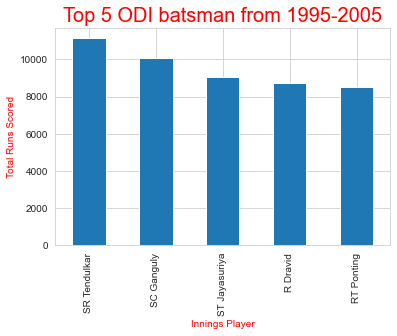

In [62]:
plt.title('Top 5 ODI batsman from 1995-2005', size = 20, color = 'Red')
plt.xlabel('Player Name' , size = 10, color = 'red')
plt.ylabel('Total Runs Scored' , size = 10, color = 'red')
sachin_df.groupby(['Innings Player'])['Innings Runs Scored Num'].sum().sort_values(ascending = False).head(5).plot(kind = 'bar')
sns.set_style("whitegrid")
plt.show()
#Top 5 players in the Tendulkar era - Plot visualisation

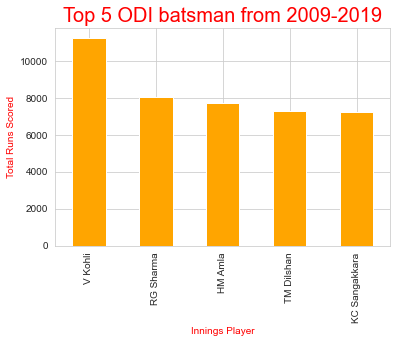

In [63]:
plt.title('Top 5 ODI batsman from 2009-2019', size = 20, color = 'Red')
plt.xlabel('Player Name' , size = 10, color = 'red')
plt.ylabel('Total Runs Scored' , size = 10, color = 'red')
virat_df.groupby(['Innings Player'])['Innings Runs Scored Num'].sum().sort_values(ascending = False).head(5).plot(kind = 'bar', color = 'orange')
sns.set_style("whitegrid")
plt.show()
#Top 5 players in the Virat era - Plot visualisation

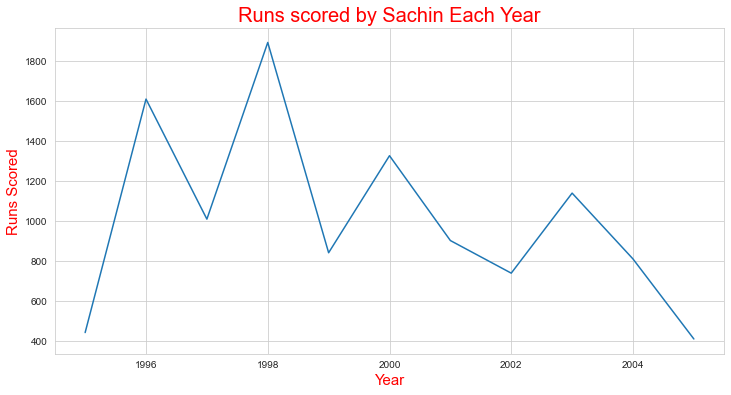

In [67]:
fig = plt.subplots(figsize=(12,6))
plt.title('Runs scored by Sachin Each Year', size = 20, color= 'red')
plt.xlabel('Year',size = 15, color= 'red')
plt.ylabel('Runs Scored',size = 15, color= 'red')
sachin.groupby(['Year'])['Innings Runs Scored Num'].sum().plot(kind='line')
sns.set_style("whitegrid")
plt.show()

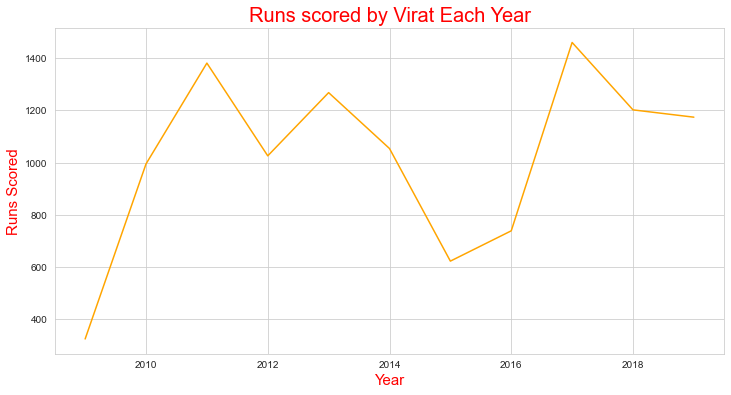

In [66]:
fig = plt.subplots(figsize=(12,6))
plt.title('Runs scored by Virat Each Year', size = 20, color= 'red')
plt.xlabel('Year',size = 15, color= 'red')
plt.ylabel('Runs Scored',size = 15, color= 'red')
virat.groupby(['Year'])['Innings Runs Scored Num'].sum().plot(kind='line', color = 'orange')
sns.set_style("whitegrid")
plt.show()

Conclusion

In [90]:
SachinPTS = 0
ViratPTS = 0

if SachinRPI>ViratRPI:
    SachinPTS = SahinPTS+1
    print('Sachin has better RPI than Virat')
else :
    ViratPTS = ViratPTS+1
    print('Virat has better RPI than Sachin')
    
#--------------

if Sachin100>Virat100:
    SachinPTS = SahinPTS+1
    print('Sachin has more than 100s Virat')
else :
    ViratPTS = ViratPTS+1
    print('Virat has more 100s Sachin')
    
#--------------

if Sachin50>Virat50:
    SachinPTS = SahinPTS+1
    print('Sachin has more than 50s Virat')
else :
    ViratPTS = ViratPTS+1
    print('Virat has more 50s Sachin')
    
#--------------

if SachinSR>ViratSR:
    SachinPTS = SahinPTS+1
    print('Sachin has better Strike Rate than Virat')
else :
    ViratPTS = ViratPTS+1
    print('Virat has better Strike Rate than Sachin')
    
#--------------

if SachinCont>ViratCont:
    SachinPTS = SahinPTS+1
    print('Sachin has contributed more than Virat')
else :
    ViratPTS = ViratPTS+1
    print('Virat has contributed more than Sachin')

Virat has better RPI than Sachin
Virat has more 100s Sachin
Virat has more 50s Sachin
Virat has better Strike Rate than Sachin
Virat has contributed more than Sachin


In [95]:
print('Sachin won in ',SachinPTS,' categories and Virat won in ',ViratPTS,' catogories.')
print('----------')

Sachin won in  0  categories and Virat won in  5  catogories.
----------


In [100]:
if SachinPTS>ViratPTS:
    print('\033[1m''Sachin is better than Virat.')
else : 
    ViratPTS>SachinPTS
    print('\033[1m''Virat is better than Sachin.')

Virat is better than Sachin.
